In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
df = pd.read_csv('for ML.csv')
real = pd.read_csv('ข้อมูลจริง.csv')

In [4]:
selected_columns = df[['มูลค่า(ล้านบาท)','latitude','longtitude']]

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

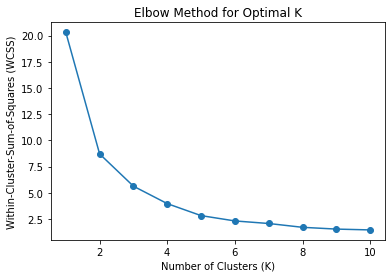

In [5]:
wcss = []  # Within-Cluster-Sum-of-Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='random', max_iter=1000, random_state=42)
    kmeans.fit(df[['latitude', 'longtitude', 'มูลค่า(ล้านบาท)']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

In [6]:
optimal_k = 3  # ตัวอย่าง (จำนวน Cluster ที่เลือก)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(selected_columns)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
optimal_k = 3  # ตัวอย่าง (จำนวน Cluster ที่เลือก)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(selected_columns)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


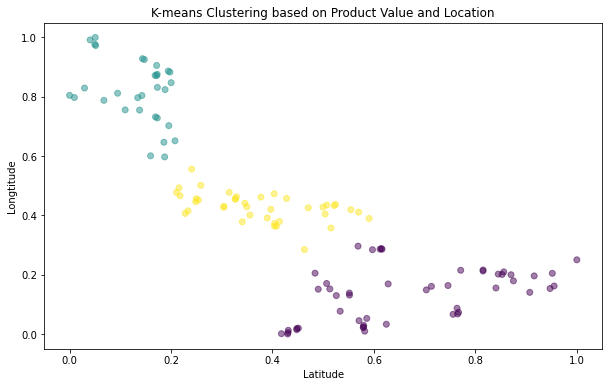

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(selected_columns['latitude'], selected_columns['longtitude'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.title('K-means Clustering based on Product Value and Location')
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.show()

In [9]:
# ทำ K-means clustering ด้วยจำนวนกลุ่มที่เลือกจาก Elbow Method
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(selected_columns)

# หาตำแหน่ง centroids ของแต่ละกลุ่ม
centroids = kmeans.cluster_centers_
print(centroids)
print(clusters)
clustered_data = pd.concat([df, pd.DataFrame({'cluster': kmeans.labels_})], axis=1)
afterclus_real = pd.concat([real, pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

[[0.05704049 0.66766288 0.13418934]
 [0.05330955 0.1331358  0.81926848]
 [0.04660337 0.37496206 0.42831475]]
[0 0 2 2 1 1 0 2 0 1 0 2 2 0 2 0 2 2 0 2 0 1 0 1 2 0 0 2 2 1 1 2 1 1 0 0 0
 2 2 2 1 0 2 0 1 0 1 2 0 0 0 2 2 1 1 0 2 0 1 0 2 2 0 0 0 2 2 1 1 0 2 0 1 0
 1 2 0 0 0 2 2 1 1 0 2 0 1 0 1 2 0 0 0 2 2 1 1 0 0 1 0 1 2 0 0 0 2 2 1 1 2
 1 1 2 0 0 2 0 2 0 0]


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


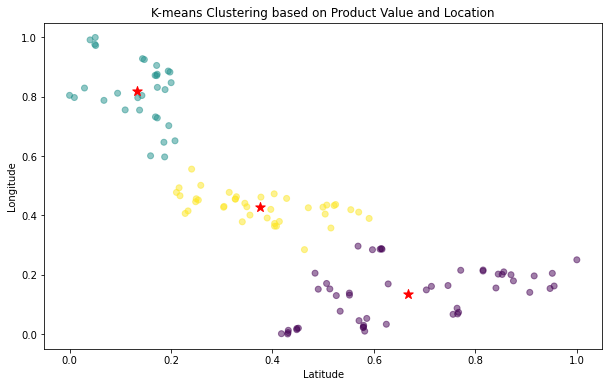

In [19]:
# พล็อต scatter plot ของข้อมูล
plt.figure(figsize=(10, 6))
plt.scatter(selected_columns['latitude'], selected_columns['longtitude'], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('K-means Clustering based on Product Value and Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# พล็อตตำแหน่งของ centroids ของแต่ละกลุ่ม
plt.scatter(centroids[0][1],centroids[0][2],marker='*',s=100,color='red')
plt.scatter(centroids[1][1],centroids[1][2],marker='*',s=100,color='red')
plt.scatter(centroids[2][1],centroids[2][2],marker='*',s=100,color='red')
plt.show()

In [11]:
clustered_data.to_csv('clusterเเล้ว.csv', index=False)
afterclus_real.to_csv('ข้อมูลจริงหลังจัดกลุ่ม.csv', index=False)

In [12]:
afterclus_real

,จังหวัด,สินค้าเกษตร,เนื้อที่เพาะปลูก(ไร่),เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิต(ตัน),ผลผลิตต่อเนื้อที่เพาะปลูก(กก./ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก./ไร่),ราคาสินค้าต่อหน่วย(บาท/กก),มูลค่า(ล้านบาท),latitude,longtitude,cluster
0,1,1,855,855,194,227.0,227,53.46,10.37124,8.246772,98.856646,0
1,2,1,1985,1965,118,59.0,60,53.46,6.30828,10.115470,99.068008,0
2,3,1,1286,1286,438,341.0,341,53.46,23.41548,7.807428,99.658137,2
3,4,1,12404,12104,3335,269.0,276,53.46,178.28910,8.421343,99.889529,2
4,5,1,14065,14065,1622,115.0,115,53.46,86.71212,5.948623,101.897284,1
...,...,...,...,...,...,...,...,...,...,...,...,...
116,4,10,86,86,281,3267.0,3267,43.45,12.20945,8.294287,99.856920,2
117,7,10,2,2,4,2000.0,2000,43.45,0.17380,8.735320,98.499928,0
118,8,10,3840,3169,10627,2767.0,3353,43.45,461.74315,7.802871,100.019746,2
119,11,10,223,223,907,4067.0,4067,43.45,39.40915,9.660001,98.574336,0


In [20]:
tf = pd.read_csv('clusterเเล้ว.csv')

# ลบคอลัมน์ช่องสุดท้าย
tf.drop(df.columns[-1], axis=1, inplace=True)

# เซฟ DataFrame ที่เปลี่ยนแปลงไปยังไฟล์ CSV ใหม่
df.to_csv('clusterเเล้ว.csv', index=False)

In [12]:
clus=pd.read_csv('clusterเเล้ว.csv')

In [13]:
realreal=pd.read_csv('ข้อมูลจริงหลังจัดกลุ่ม.csv')

In [14]:
realreal.to_excel('ข้อมูล.xlsx', index=False)

In [15]:
import math

In [16]:
group0_product_value = clus.loc[realreal['cluster'] == 0, 'มูลค่า(ล้านบาท)'].copy()
group0_product_areap = clus.loc[realreal['cluster'] == 0, 'เนื้อที่เพาะปลูก(ไร่)'].copy()
group0_product_areah = clus.loc[realreal['cluster'] == 0, 'เนื้อที่เก็บเกี่ยว(ไร่)'].copy()
group0_product = clus.loc[realreal['cluster'] == 0, 'ผลผลิต(ตัน)'].copy()
group0_product_plant = clus.loc[realreal['cluster'] == 0, 'ผลผลิตต่อเนื้อที่เพาะปลูก(กก./ไร่)'].copy()
group0_product_har = clus.loc[realreal['cluster'] == 0, 'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก./ไร่)'].copy()

In [17]:
group1_product_value = clus.loc[realreal['cluster'] == 1, 'มูลค่า(ล้านบาท)'].copy()
group1_product_areap = clus.loc[realreal['cluster'] == 1, 'เนื้อที่เพาะปลูก(ไร่)'].copy()
group1_product_areah = clus.loc[realreal['cluster'] == 1, 'เนื้อที่เก็บเกี่ยว(ไร่)'].copy()
group1_product = clus.loc[realreal['cluster'] == 1, 'ผลผลิต(ตัน)'].copy()
group1_product_plant = clus.loc[realreal['cluster'] == 1, 'ผลผลิตต่อเนื้อที่เพาะปลูก(กก./ไร่)'].copy()
group1_product_har = clus.loc[realreal['cluster'] == 1, 'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก./ไร่)'].copy()

In [18]:
group2_product_value = clus.loc[realreal['cluster'] == 2, 'มูลค่า(ล้านบาท)'].copy()
group2_product_areap = clus.loc[realreal['cluster'] == 2, 'เนื้อที่เพาะปลูก(ไร่)'].copy()
group2_product_areah = clus.loc[realreal['cluster'] == 2, 'เนื้อที่เก็บเกี่ยว(ไร่)'].copy()
group2_product = clus.loc[realreal['cluster'] == 2, 'ผลผลิต(ตัน)'].copy()
group2_product_plant = clus.loc[realreal['cluster'] == 2, 'ผลผลิตต่อเนื้อที่เพาะปลูก(กก./ไร่)'].copy()
group2_product_har = clus.loc[realreal['cluster'] == 2, 'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก./ไร่)'].copy()


In [19]:
group0_1 = np.mean(group0_product_value)
group0_2 = np.mean(group0_product_areap)
group0_3 = np.mean(group0_product_areah)
group0_4 = np.mean(group0_product)
group0_5 = np.mean(group0_product_plant)
group0_6 = np.mean(group0_product_har)

In [20]:
group1_1 = np.mean(group1_product_value)
group1_2 = np.mean(group1_product_areap)
group1_3 = np.mean(group1_product_areah)
group1_4 = np.mean(group1_product)
group1_5 = np.mean(group1_product_plant)
group1_6 = np.mean(group1_product_har)


In [21]:
group2_1 = np.mean(group2_product_value)
group2_2 = np.mean(group2_product_areap)
group2_3 = np.mean(group2_product_areah)
group2_4 = np.mean(group2_product)
group2_5 = np.mean(group2_product_plant)
group2_6 = np.mean(group2_product_har)


In [22]:
Cluster=['Cluster1','Cluster2','Cluster3']
C_1=[group0_1,group0_2,group0_3,group0_4,group0_5,group0_6]
C_2=[group1_1,group1_2,group1_3,group1_4,group1_5,group1_6]
C_3=[group2_1,group2_2,group2_3,group2_4,group2_5,group2_6]
categories = ['value', 'cultivated area', 'harvest area','Product','Product_cultivated area','Product_harvest area']
N = len(categories)

In [23]:
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
C_1 += C_1[:1]
C_2 += C_2[:1]
C_3 += C_3[:1]

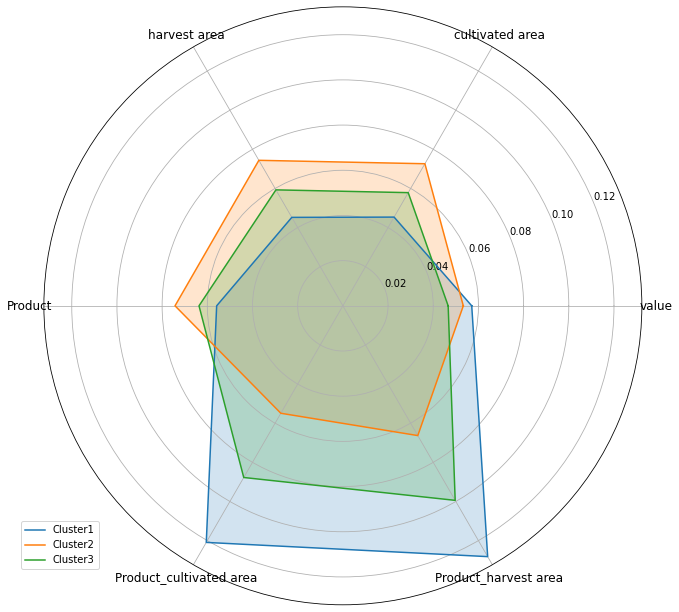

In [24]:
fig, ax = plt.subplots(figsize=(11, 11), subplot_kw=dict(polar=True))
# พล็อต radar chart สำหรับแต่ละคลาส
ax.plot(angles, C_1, label=Cluster[0])
ax.fill(angles, C_1, alpha=0.2)

ax.plot(angles, C_2, label=Cluster[1])
ax.fill(angles, C_2, alpha=0.2)

ax.plot(angles, C_3, label=Cluster[2])
ax.fill(angles, C_3, alpha=0.2)

# เพิ่มชื่อ attributes บนแกน x
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories,fontsize=12)

plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))
# แสดง radar chart
plt.show()

In [22]:
afterclus_real.to_excel('ชื่อไฟล์2.xlsx', index=False)